In [1]:
%matplotlib inline

In [2]:
# Cargo librerias
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as  sns
import sklearn.preprocessing as preprocessing
import math

In [59]:
# Cargo el Dataset
data = pd.read_csv("Data/pokemon.csv")

In [60]:
data.shape # 801 filas y 41 columnas

(801, 41)

In [63]:
# Miro el nombre de las variables que tiene el dataset. 
data.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [62]:
data.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [65]:
# Son muchas variables. Voy a crear un dataset mas pequeño para poder trabajar
data1 = data[["name", "attack", "defense", "speed", "type1", "type2", "height_m", "weight_kg",
              "capture_rate", "experience_growth", "generation", "is_legendary"]]

In [6]:
# Miro los diez primeros valores.
data1.head(10)

,name,attack,defense,speed,type1,type2,height_m,weight_kg,capture_rate,experience_growth,generation,is_legendary
0,Bulbasaur,49,49,45,grass,poison,0.7,6.9,45,1059860,1,0
1,Ivysaur,62,63,60,grass,poison,1.0,13.0,45,1059860,1,0
2,Venusaur,100,123,80,grass,poison,2.0,100.0,45,1059860,1,0
3,Charmander,52,43,65,fire,NaN,0.6,8.5,45,1059860,1,0
4,Charmeleon,64,58,80,fire,NaN,1.1,19.0,45,1059860,1,0
5,Charizard,104,78,100,fire,flying,1.7,90.5,45,1059860,1,0
6,Squirtle,48,65,43,water,NaN,0.5,9.0,45,1059860,1,0
7,Wartortle,63,80,58,water,NaN,1.0,22.5,45,1059860,1,0
8,Blastoise,103,120,78,water,NaN,1.6,85.5,45,1059860,1,0
9,Caterpie,30,35,45,bug,NaN,0.3,2.9,255,1000000,1,0


In [7]:
# Y los diez últimos
data1.tail(10)

,name,attack,defense,speed,type1,type2,height_m,weight_kg,capture_rate,experience_growth,generation,is_legendary
791,Lunala,113,89,97,psychic,ghost,4.0,120.0,45,1250000,7,1
792,Nihilego,53,47,103,rock,poison,1.2,55.5,45,1250000,7,1
793,Buzzwole,139,139,79,bug,fighting,2.4,333.6,25,1250000,7,1
794,Pheromosa,137,37,151,bug,fighting,1.8,25.0,255,1250000,7,1
795,Xurkitree,89,71,83,electric,NaN,3.8,100.0,30,1250000,7,1
796,Celesteela,101,103,61,steel,flying,9.2,999.9,25,1250000,7,1
797,Kartana,181,131,109,grass,steel,0.3,0.1,255,1250000,7,1
798,Guzzlord,101,53,43,dark,dragon,5.5,888.0,15,1250000,7,1
799,Necrozma,107,101,79,psychic,NaN,2.4,230.0,3,1250000,7,1
800,Magearna,95,115,65,steel,fairy,1.0,80.5,3,1250000,7,1


In [8]:
# Busco las columnas que tienen NA's
data1.columns[data1.isna().any()]

Index(['type2', 'height_m', 'weight_kg'], dtype='object')

In [11]:
# A las variables del peso y la altura, sustituyo los valores faltantes por la media de todos los valores 
# de la variable
data1["height_m"].fillna(value = data["height_m"].mean(), inplace = True)
data1["weight_kg"].fillna(value = data["weight_kg"].mean(), inplace = True)

In [10]:
# Y los na's de la  variable "type2" los sustituyo por None, indicando que no tiene tipo.
data1['type2'].fillna(value = 'None', inplace = True)

In [12]:
# Observamos que se ha cambiado.
data1.head(10)

,name,attack,defense,speed,type1,type2,height_m,weight_kg,capture_rate,experience_growth,generation,is_legendary
0,Bulbasaur,49,49,45,grass,poison,0.7,6.9,45,1059860,1,0
1,Ivysaur,62,63,60,grass,poison,1.0,13.0,45,1059860,1,0
2,Venusaur,100,123,80,grass,poison,2.0,100.0,45,1059860,1,0
3,Charmander,52,43,65,fire,None,0.6,8.5,45,1059860,1,0
4,Charmeleon,64,58,80,fire,None,1.1,19.0,45,1059860,1,0
5,Charizard,104,78,100,fire,flying,1.7,90.5,45,1059860,1,0
6,Squirtle,48,65,43,water,None,0.5,9.0,45,1059860,1,0
7,Wartortle,63,80,58,water,None,1.0,22.5,45,1059860,1,0
8,Blastoise,103,120,78,water,None,1.6,85.5,45,1059860,1,0
9,Caterpie,30,35,45,bug,None,0.3,2.9,255,1000000,1,0


In [70]:
print("Valor medio de %s = %f " %(data1.columns[1], data1[data1.columns[1]].mean()))

Valor medio de attack = 77.857678 


In [71]:
print("Valor medio de %s = %f " %(data1.columns[2], data1[data1.columns[2]].mean()))

Valor medio de defense = 73.008739 


In [68]:
print("Valor medio de %s = %f " %(data1.columns[3], data1[data1.columns[3]].mean()))

Valor medio de speed = 66.334582 


In [79]:
# Pokemon con mayor ataque
at = data1["attack"]
row1 = data1[data1["attack"] == at.max()]
row1

,name,attack,defense,speed,type1,type2,height_m,weight_kg,capture_rate,experience_growth,generation,is_legendary
213,Heracross,185,115,75,bug,fighting,1.5,54.0,45,1250000,2,0


In [76]:
# Y el Pokemon con el menor ataque
row2 = data1[data1["attack"] == at.min()]
row2

,name,attack,defense,speed,type1,type2,height_m,weight_kg,capture_rate,experience_growth,generation,is_legendary
112,Chansey,5,5,50,normal,NaN,1.1,34.6,30,800000,1,0
439,Happiny,5,5,30,normal,NaN,0.6,24.4,130,800000,4,0


In [82]:
# Pokemon con mayor defensa
defn = data1["defense"]
row3 = data1[data1["defense"] == defn.max()]
row3

,name,attack,defense,speed,type1,type2,height_m,weight_kg,capture_rate,experience_growth,generation,is_legendary
207,Steelix,125,230,30,steel,ground,9.2,400.0,25,1000000,2,0
212,Shuckle,10,230,5,bug,rock,0.6,20.5,190,1059860,2,0
305,Aggron,140,230,50,steel,rock,2.1,360.0,45,1250000,3,0


In [83]:
# Y el Pokemon con el menor defensa
row4 = data1[data1["defense"] == defn.min()]
row4

,name,attack,defense,speed,type1,type2,height_m,weight_kg,capture_rate,experience_growth,generation,is_legendary
112,Chansey,5,5,50,normal,NaN,1.1,34.6,30,800000,1,0
439,Happiny,5,5,30,normal,NaN,0.6,24.4,130,800000,4,0


In [98]:
data1["capture_rate"].value_counts()

45                          250
190                          75
255                          69
75                           61
3                            58
120                          55
60                           50
90                           38
30                           20
200                          19
225                          15
25                           13
180                          11
50                            7
235                           7
150                           7
100                           6
140                           6
127                           5
70                            4
55                            3
65                            3
125                           3
220                           2
170                           2
80                            2
15                            2
130                           2
155                           1
35                            1
205                           1
160     

In [100]:
# Vamos a buscar los Pokemon mas dificiles de capturar
cap_rate = data1["capture_rate"]
row5 = data1[data1["capture_rate"] == "3"]
row5

,name,attack,defense,speed,type1,type2,height_m,weight_kg,capture_rate,experience_growth,generation,is_legendary
143,Articuno,85,100,85,ice,flying,1.7,55.4,3,1250000,1,1
144,Zapdos,90,85,100,electric,flying,1.6,52.6,3,1250000,1,1
145,Moltres,100,90,90,fire,flying,2.0,60.0,3,1250000,1,1
149,Mewtwo,150,70,140,psychic,NaN,2.0,122.0,3,1250000,1,1
242,Raikou,85,75,115,electric,NaN,1.9,178.0,3,1250000,2,1
243,Entei,115,85,100,fire,NaN,2.1,198.0,3,1250000,2,1
244,Suicune,75,115,85,water,NaN,2.0,187.0,3,1250000,2,1
248,Lugia,90,130,110,psychic,flying,5.2,216.0,3,1250000,2,1
249,Ho-Oh,130,90,90,fire,flying,3.8,199.0,3,1250000,2,1
373,Beldum,55,80,30,steel,psychic,0.6,95.2,3,1250000,3,0


In [13]:
# Pokemon que tenemos de cada genereración
data1["generation"].value_counts()

5    156
1    151
3    135
4    107
2    100
7     80
6     72
Name: generation, dtype: int64

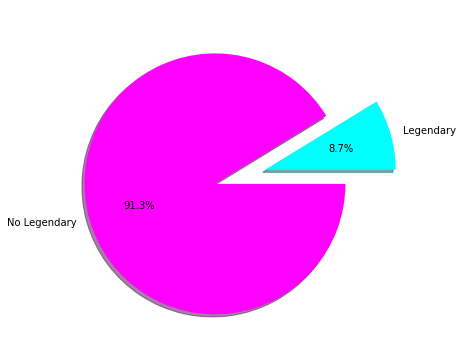

In [17]:
# Lo representamos para verlo mejor
Leng = data1[data1['is_legendary'] == 1]
NoLeng = data1[data1['is_legendary'] == 0]

x_leng = Leng["name"].count()
x_noleng = NoLeng["name"].count()

plt.figure(figsize = (6,6))

plt.pie([x_leng, x_noleng],
        labels = ["Legendary", "No Legendary"],
        colors = ["cyan", "magenta"],
        autopct ='%1.1f%%',
        shadow = True,
        explode = (0, 0.4))

plt.show()
        

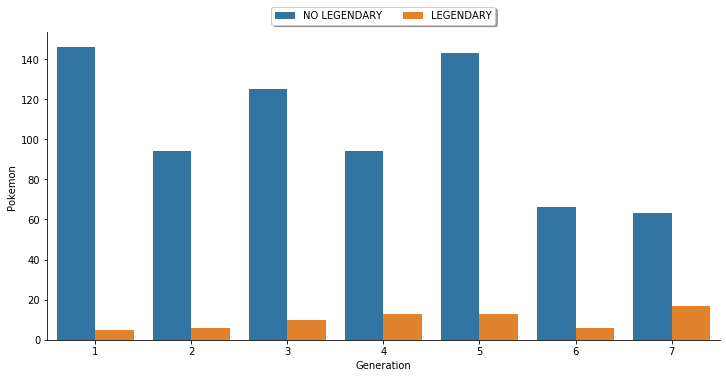

In [18]:
# Pero cuantos pokemon legendarios y no hay por cada generacion
grafica = sns.factorplot(
        x = "generation", 
        hue = "is_legendary",
        data = data1,
        kind = "count", 
        size=5, 
        aspect=2.0,
        legend = False,
        ).set_axis_labels('Generation', 'Pokemon')

grafica.ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),  shadow=True, ncol=2, 
                  labels = ['NO LEGENDARY','LEGENDARY'])

plt.show()

In [18]:
# Cuantos Pokemon hay de cada tipo
data1["type1"].value_counts()

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
ground       32
poison       32
dark         29
fighting     28
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

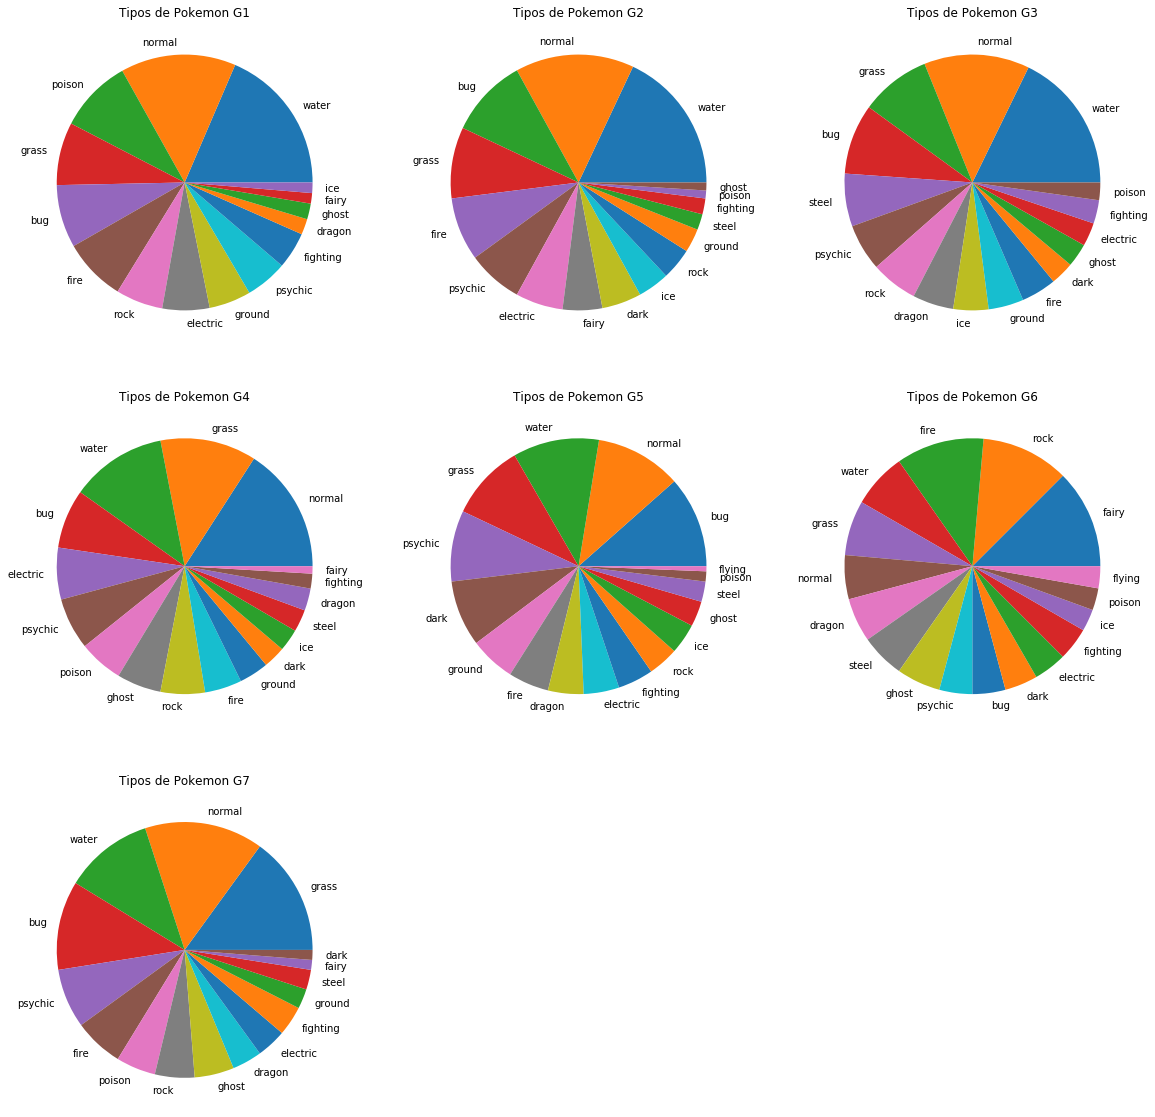

In [129]:
# Y por generacion
x_g1 = data1[data1["generation"] == 1]
x_g2 = data1[data1["generation"] == 2]
x_g3 = data1[data1["generation"] == 3]
x_g4 = data1[data1["generation"] == 4]
x_g5 = data1[data1["generation"] == 5]
x_g6 = data1[data1["generation"] == 6]
x_g7 = data1[data1["generation"] == 7]

plt.figure(1)

plt.subplot(331)
x_g1["type1"].value_counts().plot(kind = 'pie', figsize = (20,20), title = 'Tipos de Pokemon G1').set_ylabel('')

plt.subplot(332)
x_g2["type1"].value_counts().plot(kind = 'pie', figsize = (20,20), title = 'Tipos de Pokemon G2').set_ylabel('')

plt.subplot(333)
x_g3["type1"].value_counts().plot(kind = 'pie', figsize = (20,20), title = 'Tipos de Pokemon G3').set_ylabel('')

plt.subplot(334)
x_g4["type1"].value_counts().plot(kind = 'pie', figsize = (20,20), title = 'Tipos de Pokemon G4').set_ylabel('')

plt.subplot(335)
x_g5["type1"].value_counts().plot(kind = 'pie', figsize = (20,20), title = 'Tipos de Pokemon G5').set_ylabel('')

plt.subplot(336)
x_g6["type1"].value_counts().plot(kind = 'pie', figsize = (20,20), title = 'Tipos de Pokemon G6').set_ylabel('')

plt.subplot(337)
x_g7["type1"].value_counts().plot(kind = 'pie', figsize = (20,20), title = 'Tipos de Pokemon G7').set_ylabel('')


plt.show()


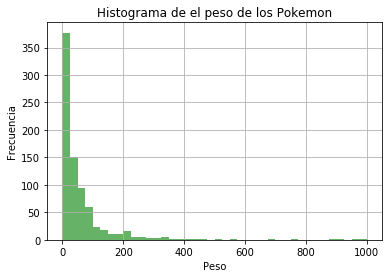

In [37]:
x_w = data1["weight_kg"]
x_h = data1["height_m"]

n, bins, patches = plt.hist(x_w, 40, facecolor = 'g', alpha = 0.6)
plt.xlabel("Peso")
plt.ylabel("Frecuencia")
plt.title("Histograma de el peso de los Pokemon")
plt.grid(True)

plt.show()

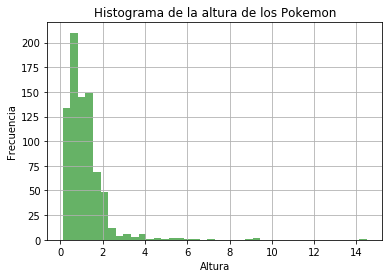

In [35]:
n, bins, patches = plt.hist(x_h, 40, facecolor = 'g', alpha = 0.6)
plt.xlabel("Altura")
plt.ylabel("Frecuencia")
plt.title("Histograma de la altura de los Pokemon")
plt.grid(True)

plt.show()

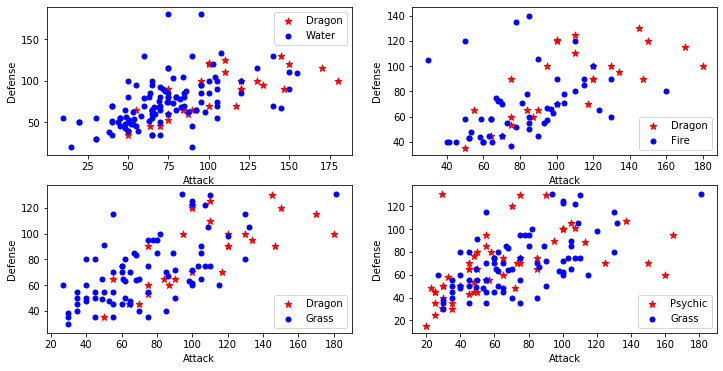

In [137]:
# Aqui represento una nube de puntos para ver que tipo de Pokemon es mas fuerte según su fuerza y ataque.

water = data1[(data1['type1'] == 'water')]
grass = data1[(data1['type1'] == 'grass')]
fire = data1[(data1['type1'] == 'fire')]
psychic = data1[(data1['type1'] == 'psychic')]

plt.figure(1, figsize = (10,10))

plt.subplot(2, 2, 1)
plt.scatter(dragon.attack, dragon.defense, color='red',label = 'Dragon',marker= "*", s=50) 
plt.scatter(water.attack, water.defense, color='blue',label = "Water", s=25)
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.legend()
plt.plot()
fig = plt.gcf()  
fig.set_size_inches(12,6) 


plt.subplot(2, 2, 2)
plt.scatter(dragon.attack, dragon.defense, color='red',label = 'Dragon',marker= "*", s=50) 
plt.scatter(fire.attack, fire.defense, color='blue',label = "Fire", s=25)
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.legend()
plt.plot()
fig = plt.gcf()  
fig.set_size_inches(12,6) 


plt.subplot(2, 2, 3)
plt.scatter(dragon.attack, dragon.defense, color='red',label = 'Dragon',marker= "*", s=50) 
plt.scatter(grass.attack, grass.defense, color='blue',label = "Grass", s=25)
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.legend()
plt.plot()
fig = plt.gcf()  
fig.set_size_inches(12,6) 

plt.subplot(2, 2, 4)
plt.scatter(psychic.attack, psychic.defense, color='red',label = 'Psychic',marker= "*", s=50) 
plt.scatter(grass.attack, grass.defense, color='blue',label = "Grass", s=25)
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.legend()
plt.plot()
fig = plt.gcf()  
fig.set_size_inches(12,6) 

plt.show()

In [47]:
data1.head(10)

,name,attack,defense,speed,type1,type2,height_m,weight_kg,capture_rate,experience_growth,generation,is_legendary
0,Bulbasaur,49,49,45,grass,poison,0.7,6.9,45,1059860,1,0
1,Ivysaur,62,63,60,grass,poison,1.0,13.0,45,1059860,1,0
2,Venusaur,100,123,80,grass,poison,2.0,100.0,45,1059860,1,0
3,Charmander,52,43,65,fire,None,0.6,8.5,45,1059860,1,0
4,Charmeleon,64,58,80,fire,None,1.1,19.0,45,1059860,1,0
5,Charizard,104,78,100,fire,flying,1.7,90.5,45,1059860,1,0
6,Squirtle,48,65,43,water,None,0.5,9.0,45,1059860,1,0
7,Wartortle,63,80,58,water,None,1.0,22.5,45,1059860,1,0
8,Blastoise,103,120,78,water,None,1.6,85.5,45,1059860,1,0
9,Caterpie,30,35,45,bug,None,0.3,2.9,255,1000000,1,0


In [53]:
def number_encode_features(data):
    result = data.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == 'object':
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column].astype('str'))
    return result, encoders

encoded_data, _ = number_encode_features(data1)

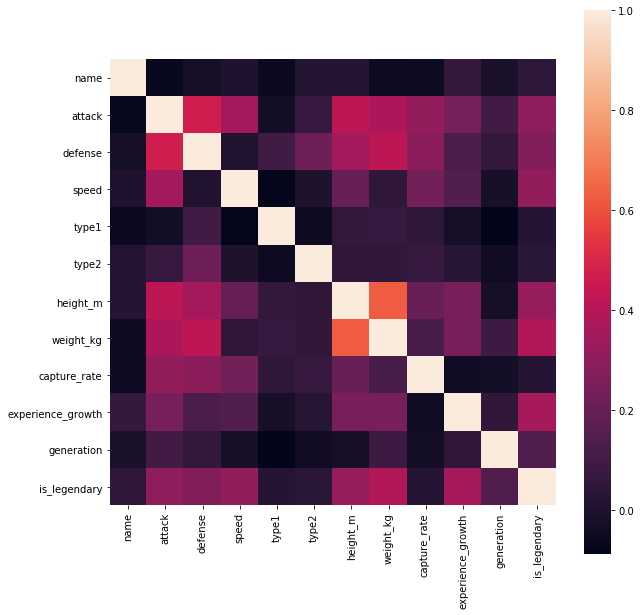

In [56]:
plt.figure(figsize = (10,10))

sns.heatmap(encoded_data.corr(), square=True)
plt.show()